# **About Dataset**

The dataset provides comprehensive information about various plant metrics related to both vegetative and root growth.

# **Objective**

Build a machine learning model that can learn from these metrics and accurately predicting the Class of the Plants.

In [1]:
# Importing the needed libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read csv file
df = pd.read_csv("C:/Users/balaj/Downloads/Advanced_IoT_Dataset.csv")
df

,Random,Average of chlorophyll in the plant (ACHP),Plant height rate (PHR),Average wet weight of the growth vegetative (AWWGV),Average leaf area of the plant (ALAP),Average number of plant leaves (ANPL),Average root diameter (ARD),Average dry weight of the root (ADWR),Percentage of dry matter for vegetative growth (PDMVG),Average root length (ARL),Average wet weight of the root (AWWR),Average dry weight of vegetative plants (ADWV),Percentage of dry matter for root growth (PDMRG),Class
0,R1,34.533468,54.566983,1.147449,1284.229549,4.999713,16.274918,1.706810,18.399982,19.739037,2.949240,0.209251,57.633906,SA
1,R1,34.489028,54.567692,1.149530,1284.247744,5.024259,16.269452,1.700930,18.398288,19.758836,2.943137,0.216154,57.633697,SA
2,R2,33.100405,67.067344,1.104647,1009.208996,5.007652,15.980760,1.185391,19.398789,20.840822,2.861635,0.200113,41.289875,SA
3,R1,34.498319,54.559049,1.137759,1284.227623,4.991501,16.276710,1.716396,18.413613,19.736098,2.946784,0.223092,57.645661,SA
4,R3,36.297008,45.588894,1.363205,981.470310,4.003682,16.979894,0.777428,31.423772,17.331894,2.766242,0.424172,27.898619,SA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,R3,46.400873,50.830830,0.883813,744.310093,4.012024,17.796293,1.085930,12.812881,18.457811,3.264946,0.108366,33.343799,TC
29996,R3,46.395047,50.838058,0.900390,744.307234,4.011764,17.809462,1.108226,12.822240,18.457313,3.259574,0.129387,33.338906,TC
29997,R2,32.707725,37.065408,0.909055,857.849380,2.992712,18.200984,0.903880,8.050019,19.070005,3.495121,0.056698,26.041147,TC
29998,R1,38.624079,37.876323,1.077557,948.663424,4.002284,15.733098,1.238818,11.953827,19.164418,3.141850,0.116892,39.125346,TC


In [3]:
# Get a quick info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Random                                                   30000 non-null  object 
 1    Average  of chlorophyll in the plant (ACHP)             30000 non-null  float64
 2    Plant height rate (PHR)                                 30000 non-null  float64
 3   Average wet weight of the growth vegetative (AWWGV)      30000 non-null  float64
 4   Average leaf area of the plant (ALAP)                    30000 non-null  float64
 5   Average number of plant leaves (ANPL)                    30000 non-null  float64
 6   Average root diameter (ARD)                              30000 non-null  float64
 7    Average dry weight of the root (ADWR)                   30000 non-null  float64
 8    Percentage of dry matter 

In [4]:
# Detecting the null values
df.isnull().sum()

Random                                                     0
 Average  of chlorophyll in the plant (ACHP)               0
 Plant height rate (PHR)                                   0
Average wet weight of the growth vegetative (AWWGV)        0
Average leaf area of the plant (ALAP)                      0
Average number of plant leaves (ANPL)                      0
Average root diameter (ARD)                                0
 Average dry weight of the root (ADWR)                     0
 Percentage of dry matter for vegetative growth (PDMVG)    0
Average root length (ARL)                                  0
Average wet weight of the root (AWWR)                      0
 Average dry weight of vegetative plants (ADWV)            0
Percentage of dry matter for root growth (PDMRG)           0
Class                                                      0
dtype: int64

In [5]:
df.columns

Index(['Random', ' Average  of chlorophyll in the plant (ACHP)',
       ' Plant height rate (PHR)',
       'Average wet weight of the growth vegetative (AWWGV)',
       'Average leaf area of the plant (ALAP)',
       'Average number of plant leaves (ANPL)', 'Average root diameter (ARD)',
       ' Average dry weight of the root (ADWR)',
       ' Percentage of dry matter for vegetative growth (PDMVG)',
       'Average root length (ARL)', 'Average wet weight of the root (AWWR)',
       ' Average dry weight of vegetative plants (ADWV)',
       'Percentage of dry matter for root growth (PDMRG)', 'Class'],
      dtype='object')

In [6]:
# Checking the Unique values of Random Column
df.Random.unique()

array(['R1', 'R2', 'R3'], dtype=object)

In [7]:
# Checking the Unique values of Class Column
df.Class.unique()

array(['SA', 'SB', 'SC', 'TA', 'TB', 'TC'], dtype=object)

In [8]:
# Checking the value counts of Class Column to check the balance of the Dataset
df.Class.value_counts()

Class
SA    5000
SB    5000
SC    5000
TA    5000
TB    5000
TC    5000
Name: count, dtype: int64

In [9]:
# Assign new column names
new_column_names = ['Random','ACHP','PHR','AWWGV','ALAP', 'ANPL','ARD','AADWR','PDMVG','ARL','AWWR','ADWV','PDMRG','Class']
df.columns = new_column_names

In [10]:
df.head()

,Random,ACHP,PHR,AWWGV,ALAP,ANPL,ARD,AADWR,PDMVG,ARL,AWWR,ADWV,PDMRG,Class
0,R1,34.533468,54.566983,1.147449,1284.229549,4.999713,16.274918,1.706810,18.399982,19.739037,2.949240,0.209251,57.633906,SA
1,R1,34.489028,54.567692,1.149530,1284.247744,5.024259,16.269452,1.700930,18.398288,19.758836,2.943137,0.216154,57.633697,SA
2,R2,33.100405,67.067344,1.104647,1009.208996,5.007652,15.980760,1.185391,19.398789,20.840822,2.861635,0.200113,41.289875,SA
3,R1,34.498319,54.559049,1.137759,1284.227623,4.991501,16.276710,1.716396,18.413613,19.736098,2.946784,0.223092,57.645661,SA
4,R3,36.297008,45.588894,1.363205,981.470310,4.003682,16.979894,0.777428,31.423772,17.331894,2.766242,0.424172,27.898619,SA


In [11]:
# Checking Duplicates in Dataframe
df.duplicated().sum()

0

In [12]:
# Encoding the Categorical Columns
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Class'] = encoder.fit_transform(df['Class'])

In [13]:
encode = LabelEncoder()
df['Random'] = encode.fit_transform(df['Random'])

In [14]:
df.head()

,Random,ACHP,PHR,AWWGV,ALAP,ANPL,ARD,AADWR,PDMVG,ARL,AWWR,ADWV,PDMRG,Class
0,0,34.533468,54.566983,1.147449,1284.229549,4.999713,16.274918,1.706810,18.399982,19.739037,2.949240,0.209251,57.633906,0
1,0,34.489028,54.567692,1.149530,1284.247744,5.024259,16.269452,1.700930,18.398288,19.758836,2.943137,0.216154,57.633697,0
2,1,33.100405,67.067344,1.104647,1009.208996,5.007652,15.980760,1.185391,19.398789,20.840822,2.861635,0.200113,41.289875,0
3,0,34.498319,54.559049,1.137759,1284.227623,4.991501,16.276710,1.716396,18.413613,19.736098,2.946784,0.223092,57.645661,0
4,2,36.297008,45.588894,1.363205,981.470310,4.003682,16.979894,0.777428,31.423772,17.331894,2.766242,0.424172,27.898619,0


In [15]:
# Checking the Unique values of Class Column after Encoding
df.Class.unique()

array([0, 1, 2, 3, 4, 5])

In [16]:
# Checking the Unique values of Random Column after Encoding
df.Random.unique()

array([0, 1, 2])

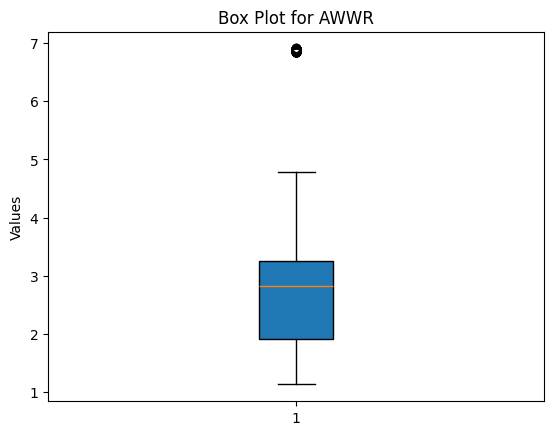

In [17]:
# Visualizing 'AWWR' column to check outlier
plt.boxplot(df['AWWR'], patch_artist=True)
plt.title(f'Box Plot for {'AWWR'}')
plt.ylabel('Values')
plt.show()

In [18]:
# Checking the number of rows of 'AWWR' column with the condition
len(df[df['AWWR'] > 4.775847])

1627

In [19]:
# Clipping the values with upper value
df['AWWR'] = df['AWWR'].clip(upper=4.775847)

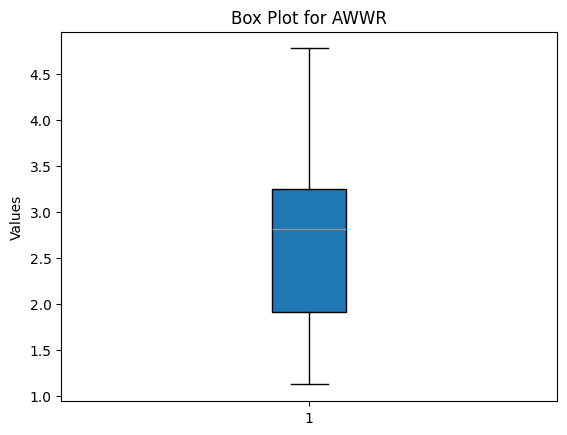

In [20]:
# Visualizing 'AWWR' column after clipping
plt.boxplot(df['AWWR'], patch_artist=True)
plt.title(f'Box Plot for {'AWWR'}')
plt.ylabel('Values')
plt.show()

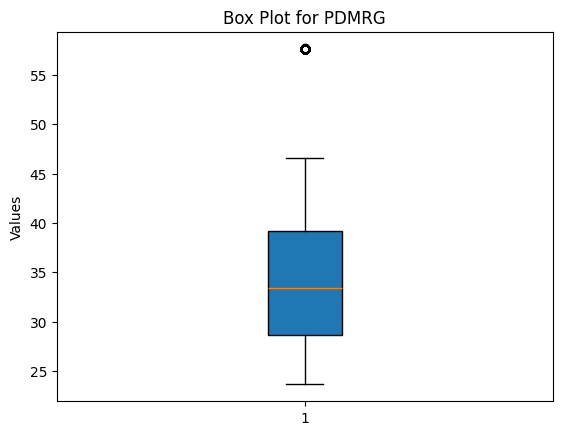

In [21]:
# # Visualizing 'PDMRG' column to check outlier
plt.boxplot(df['PDMRG'], patch_artist=True)
plt.title(f'Box Plot for {'PDMRG'}')
plt.ylabel('Values')
plt.show()

In [22]:
# Checking the number of rows of 'PDMRG' column with the condition
len(df[df['PDMRG'] > 46.57806])

1647

In [23]:
# Clipping the values with upper value
df['PDMRG'] = df['PDMRG'].clip(upper=46.57806)

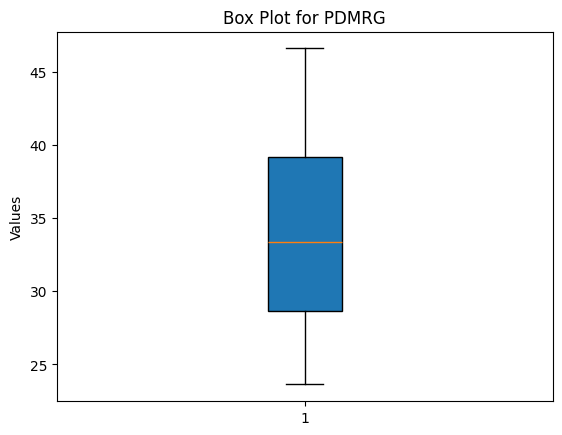

In [24]:
# Visualizing 'PDMRG' column after clipping
plt.boxplot(df['PDMRG'], patch_artist=True)
plt.title(f'Box Plot for {'PDMRG'}')
plt.ylabel('Values')
plt.show()

# **Exploratory Data Analysis(EDA)**

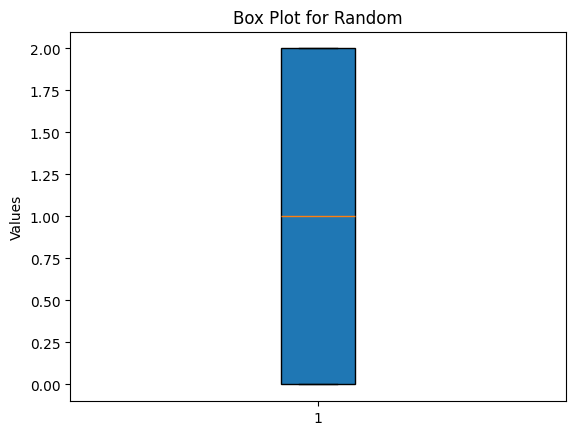

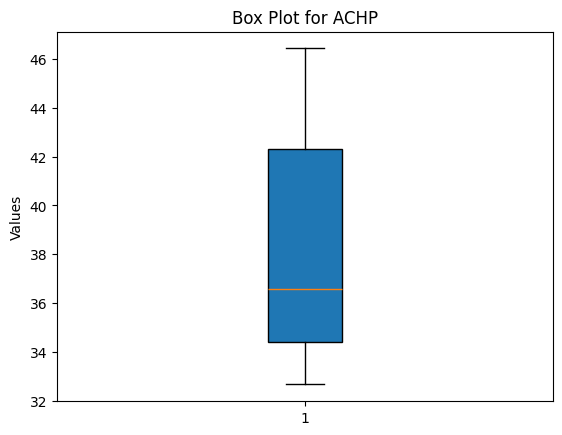

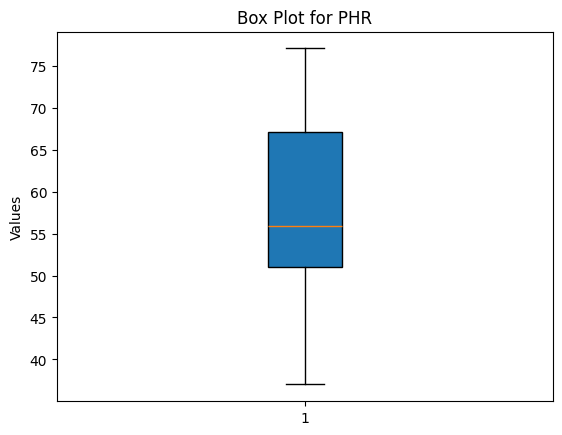

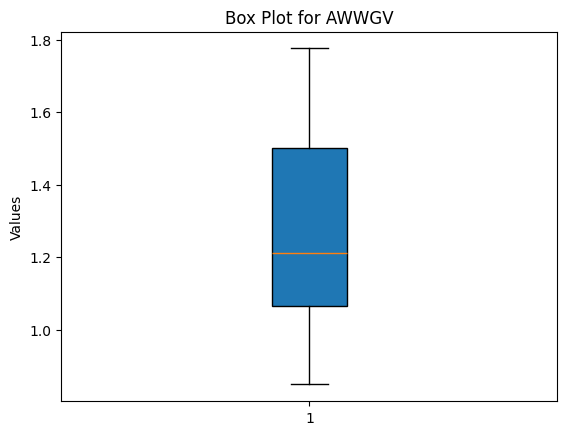

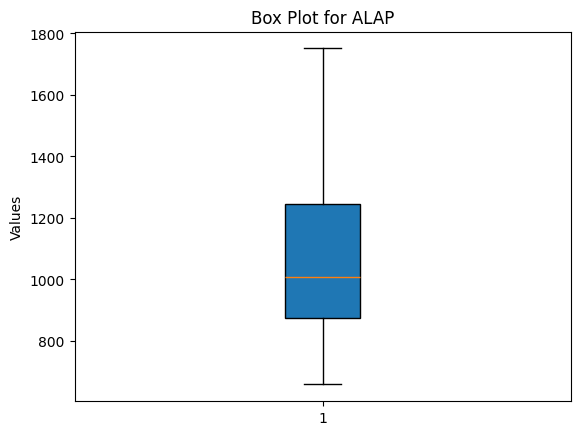

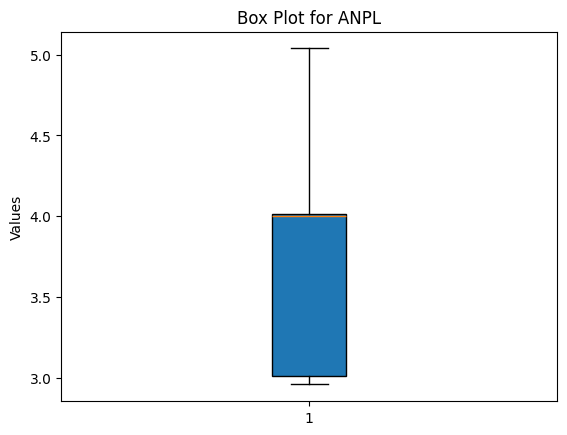

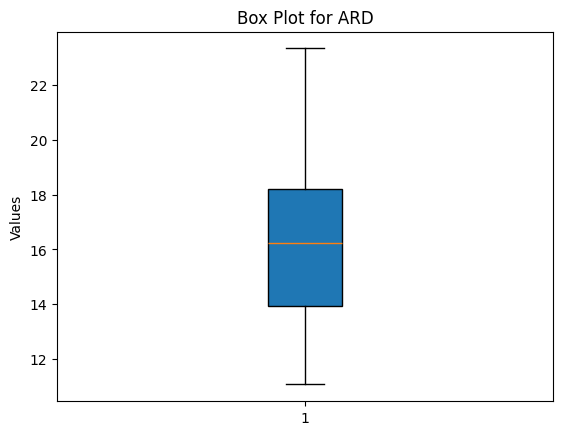

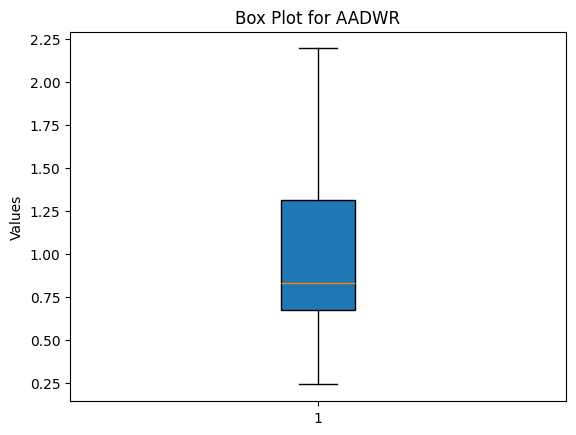

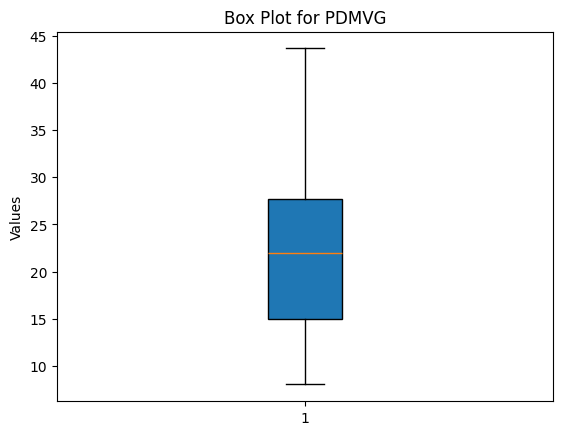

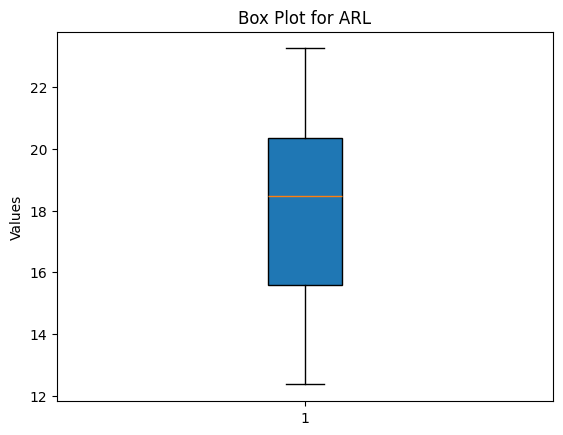

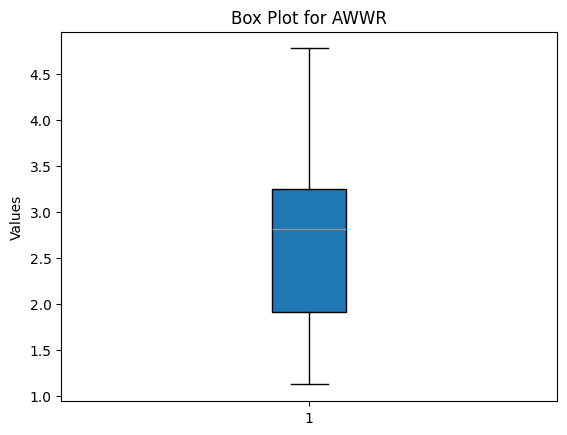

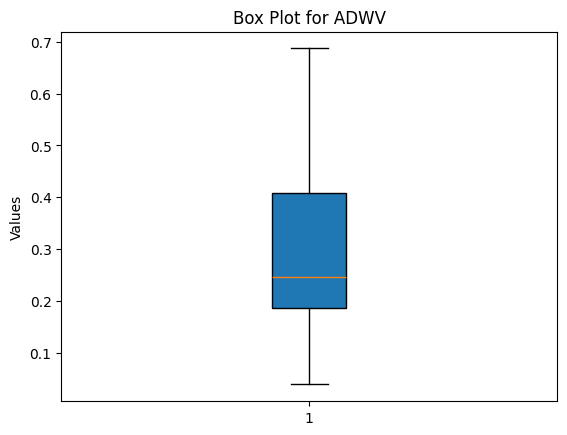

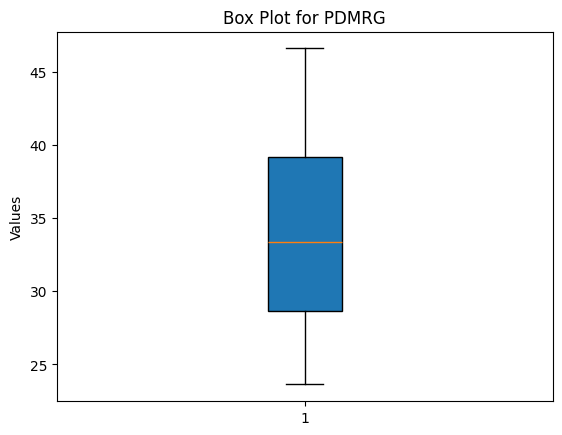

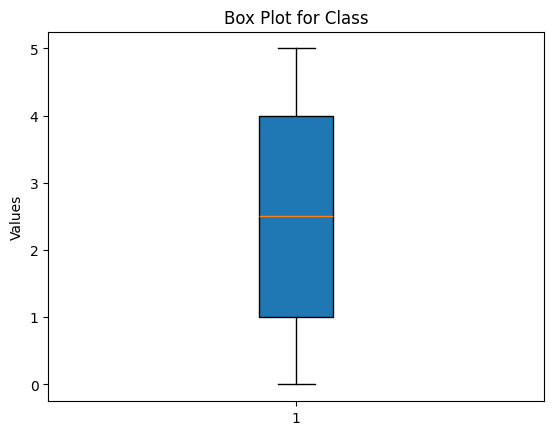

In [25]:
for column in df.columns:
    plt.figure()
    plt.boxplot(df[column], patch_artist=True)
    plt.title(f'Box Plot for {column}')
    plt.ylabel('Values')
    plt.show()

From the above Box plots it is clear that there is no outliers in the data set and this insights could be valuable for targeted output.

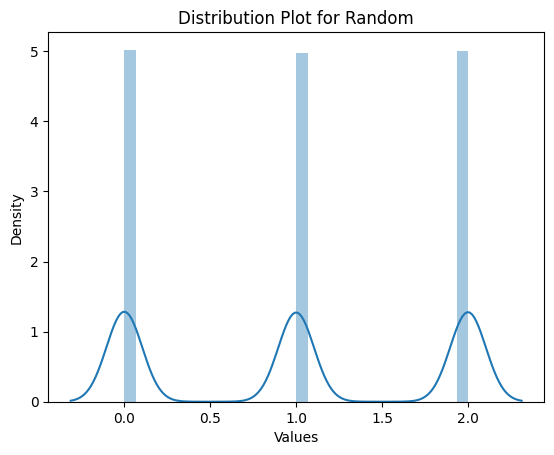

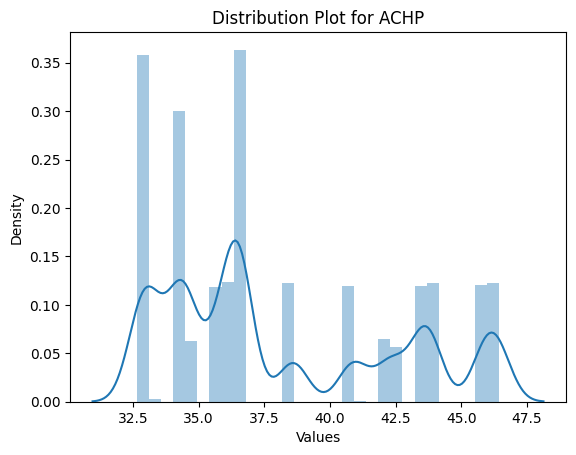

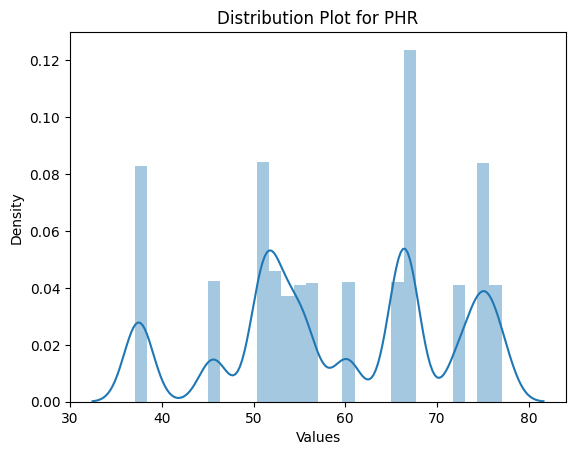

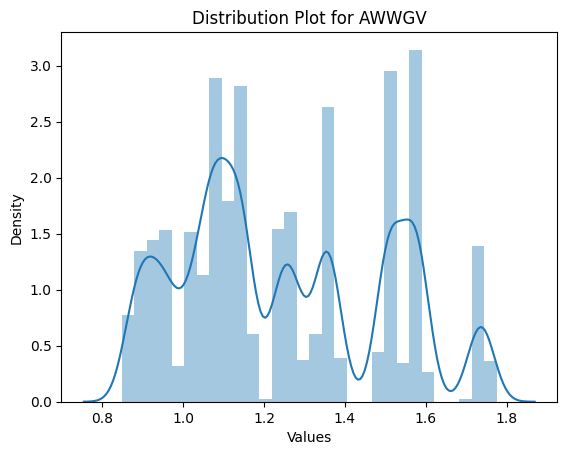

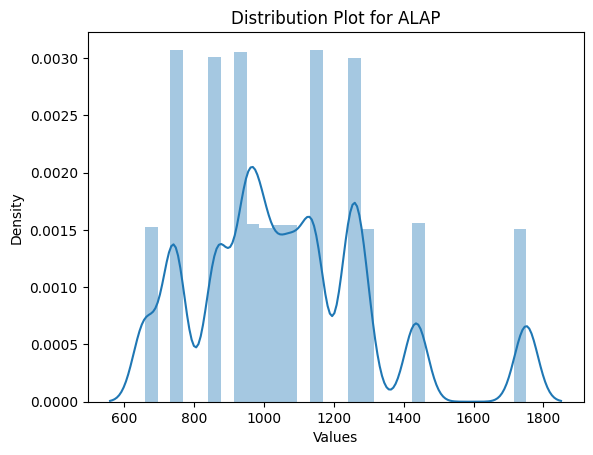

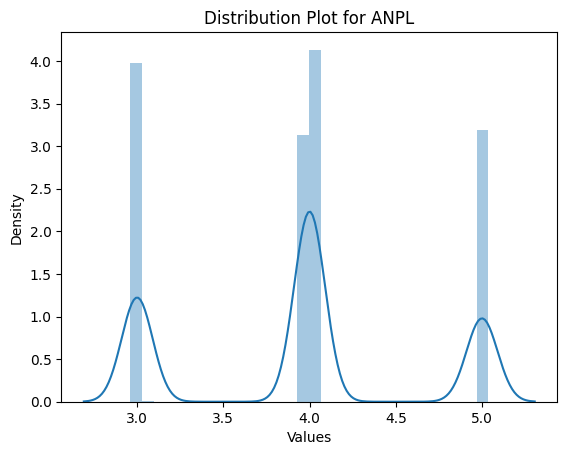

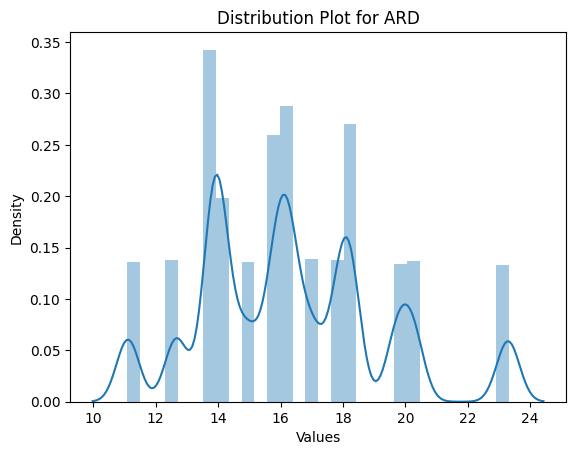

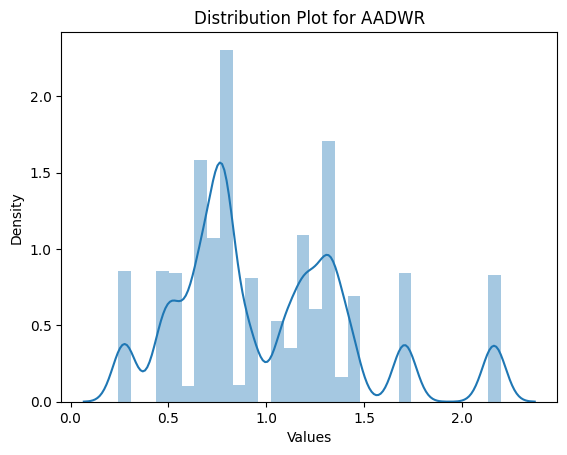

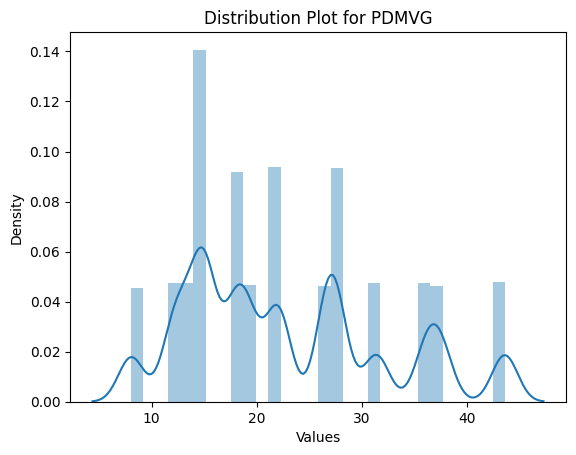

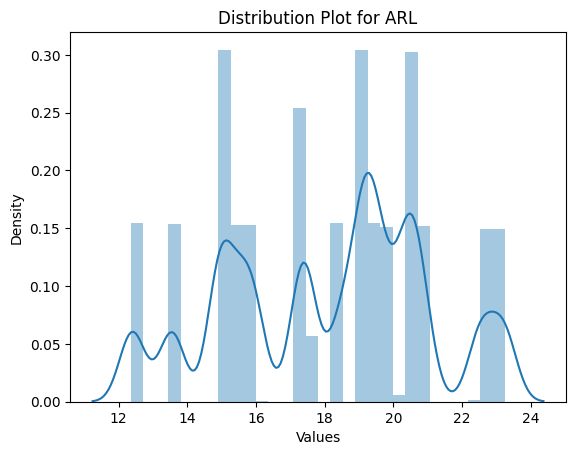

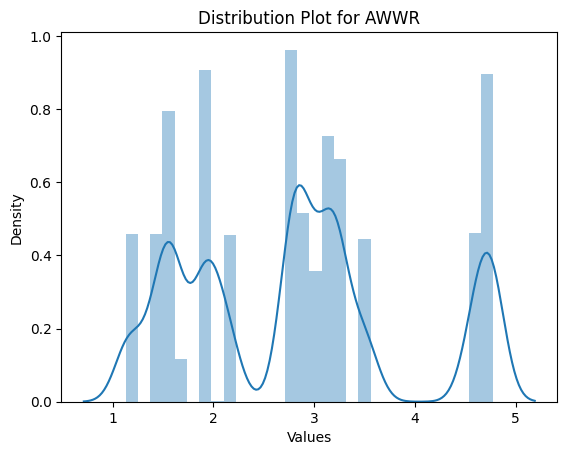

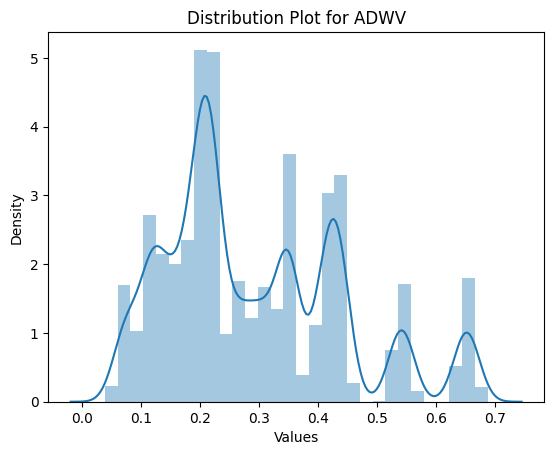

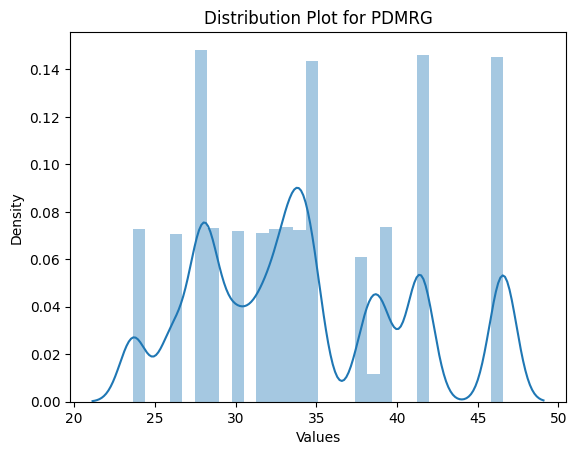

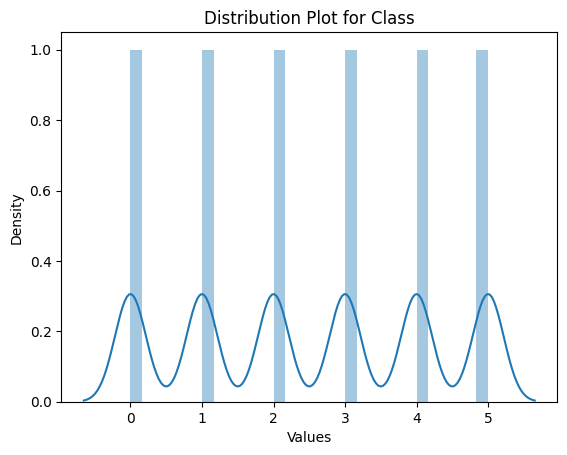

In [26]:
for column in df.columns:
    plt.figure()
    sns.distplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution Plot for {column}')
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.show()

The Distribution plots show that the data points are equally distributed across all groups, with no group exhibiting significantly different central tendencies or spreads. This uniformity suggests a consistent performance or characteristic across the examined groups.

In [27]:
# Separate the dataset into features(x) and target(y)
x = df.drop('Class',axis=1)
y = df['Class']

# **Train Test Split**

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# **Model Evaluation**

Algorithms to be used:

1.Decision Tree Classifier

2.Random Forest Classifier

3.Extra Tree Classifier

4.Gradient Boosting Classifier

In [29]:
# Applying DecisionTreeClassifier Algorithm
from sklearn.tree import DecisionTreeClassifier
DTR = DecisionTreeClassifier()
DTR.fit(x_train, y_train)

DecisionTreeClassifier()

In [30]:
y_pred_DTR = DTR.predict(x_test)
y_pred_DTR

array([0, 4, 4, ..., 4, 5, 5])

In [31]:
# Checking Accuracy of the Model
accuracy_DTR = accuracy_score(y_test,y_pred_DTR)
accuracy_DTR

1.0

In [32]:
# Confusion Matrix
confusion_DTR = confusion_matrix(y_test,y_pred_DTR)
confusion_DTR

array([[ 978,    0,    0,    0,    0,    0],
       [   0, 1024,    0,    0,    0,    0],
       [   0,    0, 1046,    0,    0,    0],
       [   0,    0,    0,  950,    0,    0],
       [   0,    0,    0,    0, 1033,    0],
       [   0,    0,    0,    0,    0,  969]], dtype=int64)

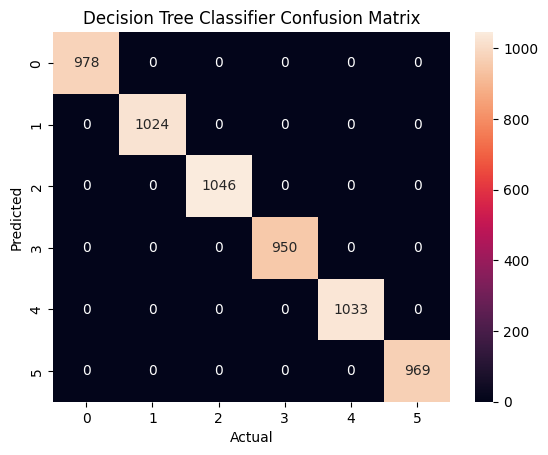

In [33]:
# HeatMap for Confusion Matrix
sns.heatmap(confusion_matrix(y_test,y_pred_DTR),annot=True,fmt='.0f').set(title='Decision Tree Classifier Confusion Matrix',xlabel='Actual',ylabel='Predicted')
plt.show()

In [34]:
# Checking Classification report of the Model to check Precision and Recall
cr_DTR = classification_report(y_test,y_pred_DTR)
print(cr_DTR)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       978
           1       1.00      1.00      1.00      1024
           2       1.00      1.00      1.00      1046
           3       1.00      1.00      1.00       950
           4       1.00      1.00      1.00      1033
           5       1.00      1.00      1.00       969

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



In [35]:
# Applying RandomForestClassifier Algorithm
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)

RandomForestClassifier()

In [36]:
y_pred_RFC = RFC.predict(x_test)
y_pred_RFC

array([0, 4, 4, ..., 4, 5, 5])

In [37]:
# Checking Accuracy of the Model
accuracy_RFC = accuracy_score(y_test,y_pred_RFC)
accuracy_RFC

1.0

In [38]:
# Confusion Matrix
confusion_RFC = confusion_matrix(y_test,y_pred_RFC)
confusion_RFC

array([[ 978,    0,    0,    0,    0,    0],
       [   0, 1024,    0,    0,    0,    0],
       [   0,    0, 1046,    0,    0,    0],
       [   0,    0,    0,  950,    0,    0],
       [   0,    0,    0,    0, 1033,    0],
       [   0,    0,    0,    0,    0,  969]], dtype=int64)

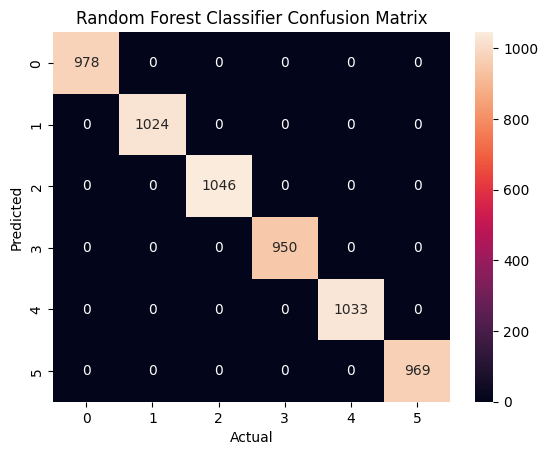

In [39]:
# HeatMap for Confusion Matrix
sns.heatmap(confusion_matrix(y_test,y_pred_RFC),annot=True,fmt='.0f').set(title='Random Forest Classifier Confusion Matrix',xlabel='Actual',ylabel='Predicted')
plt.show()

In [40]:
# Checking Classification report of the Model to check Precision and Recall
cr_RFC = classification_report(y_test,y_pred_RFC)
print(cr_RFC)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       978
           1       1.00      1.00      1.00      1024
           2       1.00      1.00      1.00      1046
           3       1.00      1.00      1.00       950
           4       1.00      1.00      1.00      1033
           5       1.00      1.00      1.00       969

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



In [41]:
# Applying ExtraTreesClassifier Algorithm
from sklearn.ensemble import ExtraTreesClassifier
ETC_model=ExtraTreesClassifier()
ETC_model.fit(x_train, y_train)

ExtraTreesClassifier()

In [42]:
y_pred_ETC = ETC_model.predict(x_test)
y_pred_ETC

array([0, 4, 4, ..., 4, 5, 5])

In [43]:
# Checking Accuracy of the Model
accuracy_ETC = accuracy_score(y_test,y_pred_ETC)
accuracy_ETC

1.0

In [44]:
# Confusion Matrix
confusion_ETC = confusion_matrix(y_test,y_pred_ETC)
confusion_ETC

array([[ 978,    0,    0,    0,    0,    0],
       [   0, 1024,    0,    0,    0,    0],
       [   0,    0, 1046,    0,    0,    0],
       [   0,    0,    0,  950,    0,    0],
       [   0,    0,    0,    0, 1033,    0],
       [   0,    0,    0,    0,    0,  969]], dtype=int64)

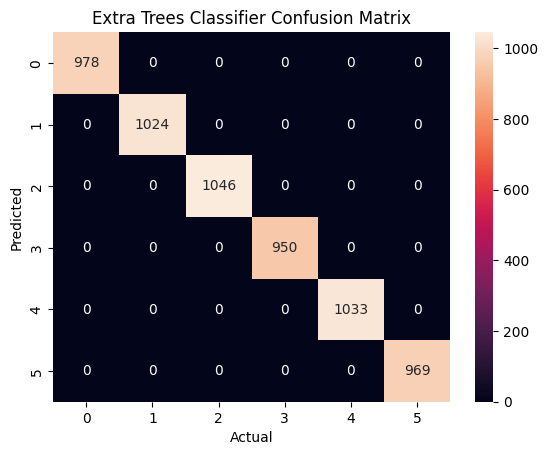

In [45]:
# HeatMap for Confusion Matrix
sns.heatmap(confusion_matrix(y_test,y_pred_ETC),annot=True,fmt='.0f').set(title='Extra Trees Classifier Confusion Matrix',xlabel='Actual',ylabel='Predicted')
plt.show()

In [46]:
# Checking Classification report of the Model to check Precision and Recall
cr_ETC = classification_report(y_test,y_pred_ETC)
print(cr_ETC)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       978
           1       1.00      1.00      1.00      1024
           2       1.00      1.00      1.00      1046
           3       1.00      1.00      1.00       950
           4       1.00      1.00      1.00      1033
           5       1.00      1.00      1.00       969

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



In [47]:
# Applying GradientBoostingClassifier Algorithm
from sklearn.ensemble import GradientBoostingClassifier
GB_model=GradientBoostingClassifier()
GB_model.fit(x_train, y_train)

GradientBoostingClassifier()

In [48]:
y_pred_GB = GB_model.predict(x_test)
y_pred_GB

array([0, 4, 4, ..., 4, 5, 5])

In [49]:
# Checking Accuracy of the Model
accuracy_GB = accuracy_score(y_test,y_pred_GB)
accuracy_GB

1.0

In [50]:
# Confusion Matrix
confusion_GB = confusion_matrix(y_test,y_pred_GB)
confusion_GB

array([[ 978,    0,    0,    0,    0,    0],
       [   0, 1024,    0,    0,    0,    0],
       [   0,    0, 1046,    0,    0,    0],
       [   0,    0,    0,  950,    0,    0],
       [   0,    0,    0,    0, 1033,    0],
       [   0,    0,    0,    0,    0,  969]], dtype=int64)

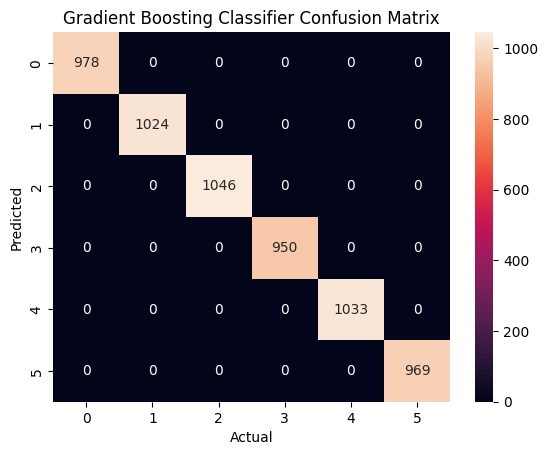

In [51]:
# HeatMap for Confusion Matrix
sns.heatmap(confusion_matrix(y_test,y_pred_GB),annot=True,fmt='.0f').set(title='Gradient Boosting Classifier Confusion Matrix',xlabel='Actual',ylabel='Predicted')
plt.show()

In [52]:
# Checking Classification report of the Model to check Precision and Recall
cr_GB = classification_report(y_test,y_pred_GB)
print(cr_GB)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       978
           1       1.00      1.00      1.00      1024
           2       1.00      1.00      1.00      1046
           3       1.00      1.00      1.00       950
           4       1.00      1.00      1.00      1033
           5       1.00      1.00      1.00       969

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



In [53]:
# Pickling the File
with open('Class.pkl', 'wb') as file:
    pickle.dump(RFC, file)

# **Sample Prediction**

In [54]:
# Sample measurements of a Plant
sample_measurements = np.array([1,35.265,84.25,2.54,1024.52,7.85,25.415,1.245,65.214,33.512,4.512,1.48,44.512])
result =list(RFC.predict([sample_measurements]))
predicted_result=encoder.inverse_transform([result])
print('Predicted Class is :',predicted_result)

Predicted Class is : ['SB']
